## **K-means Clustering**



### **Introduction**
I am  going explore clustering method:

  - K-Means
  
K-means creates clusters based on a distance measure.  Using a small example data set, we will implement the algorithm and visualize the results.

Even though the example data is small and 2 dimensional, write your helper functions to not assume a 2-D data set.  Your plotting code can reference the `x` and `y` column names from the sample data directly.

**Please ensure that all functions you implement include comprehensive docstrings with all the necessary components. The first method's docstring is provided for you as an example.**


In [ ]:
# Please do not import any other libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# **K-Means Algorithm**
 We will build up some helper functions along the way, test them, and put it all together to apply to our small example data set.

**Load the Data**


In [ ]:
# Load the data from the provided CSV file into a dataframe.
# Write your code here
df_kmeans = pd.read_csv('data_kmeans.csv')

FileNotFoundError: ignored

## **Q1 - Write a function that returns `k` random rows from a data frame**

**A)** To initialize the centroids, we pick `k` random points from a data frame.  Write a function `init_centroids( df_data, k )` that accepts two parameters: a data frame `df_data`, and an integer `k`, and returns the initial centroids for our k-means algorithm.  Note, we want the indices of the returned dataframe to range from 0 - (k-1) so that we can use these as the centroid labels.  Use [pandas sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, and pass it the value of $42$ for `random_state`. Your function must have proper docstring.

In [ ]:
def init_centroids( df_data, k ):
    return df_data.sample(n=k, random_state=42)


**B)** Call your function with the dataframe you created earlier

In [ ]:
# Write your code here
df_centroids = init_centroids( df_kmeans, 7 )
df_centroids

,x,y
407,-0.633437,0.488756
444,-0.597736,0.632194
117,-0.635867,0.166613
30,-0.539351,-0.875532
415,-0.588597,0.293062
157,-0.127985,-0.136639
325,0.342579,0.211717


## **Q2 - Write a function to assign every row in a data frame to a centroid**

**A)** Write a function, `assign_to_centroid`, that accepts two parameters: a data frame, `df_data`, that represents our data to be clustered, and the data frame, `df_centroids`, which is of length `k` and contains the current centroids for our clusters.  The functions returns a series of the same length of `df_data` that contains the index of the closest centroid in `df_centroid`.  Use Euclidean distance as your distance measure.

For example, if a row of data contained the data point $(100,123)$ and the three centroids were in a data frame that had the following information:

  - Index 0 : (34,34)
  - Index 1 : (0,1)
  - Index 2 : (83,99)

The `assign_to_centroid` function would assign the index $2$ to that row of data. Your function must have proper docstring.

In [ ]:
def assign_to_centroid( df_data, df_centroids ):
    distances = np.sqrt(((df_data.values[:, np.newaxis] - df_centroids.values) ** 2).sum(axis=2))
    return pd.Series(np.argmin(distances, axis=1))

**B)** Check how many data points were assigned to each centroid

In [ ]:
s_centroid_assignment = assign_to_centroid( df_kmeans, df_centroids )
s_centroid_assignment.value_counts()

6    126
1     94
3     71
5     58
0     53
2     26
4     22
dtype: int64

## **Q3 - Write a function that recomputes the centroids**

Write a function `compute_centroids()` that takes two parameters: the data frame, `df_data` containing the data being clustered, and a series of the same length that contains the label of the assigned centroid for every row in df_data, `s_centroid_assignment`. The function will return the a data frame containing the centroids (mean) value for each unique centroid.

Note that the indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`.  For example, if I found the mean value of df_data using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`.

Your function must have proper docstring.


In [ ]:
def compute_centroids( df_data, s_centroid_assignment ):
    return df_data.groupby(s_centroid_assignment).mean()

**Check your results by calling your method**

In [ ]:
df_new_centroids = compute_centroids( df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
0,-0.715983,0.500552
1,-0.721574,0.708343
2,-0.738268,-0.113830
3,-0.696694,-0.699028
4,-0.546913,0.321364
5,-0.102365,-0.188876
6,0.523364,0.238569


## **Q4 - Write a function that compares two centroid data frames**

The stopping criterion for k-means is when our centroids have not moved since the last iteration.  Write a function `compare_centroids` that is given 2 centroid data frames, `df_centroid_a`, and `df_centroid_b` as parameters and returns `True` or `False` indicating if the centroids at each unique index in the data frame are equal. Use the [equals](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html) method to compare equality of pandas Series objects.  Your function must have proper docstring.

In [ ]:
def compare_centroids( df_centroid_a, df_centroid_b ):
  return df_centroid_a.equals(df_centroid_b)

**Test your implementation by calling your function. It should print `True`, followed by `False`**

In [ ]:
print(compare_centroids( df_new_centroids, df_new_centroids ))
print(compare_centroids( df_new_centroids, df_centroids ))

True
False


## **Q5 - Write a function that implements k-means**

Write a function, `k_means`, that takes in as parameters 2 values, a data frame with values to cluster, `df_data`, and the number of clusters to form, `k`.  The function should return a series of data of the same length as `df_data` that contains the cluster assignment (an integer from 0 to (k-1)) for each row of data.  Use the helper functions defined in the prior questions. Your function must have proper docstring.

In [ ]:
def k_means( df_data, k ):
    centroids = init_centroids(df_data, k)
    old_centroids = centroids.copy()
    while True:
        centroid_assignment = assign_to_centroid(df_data, centroids)
        centroids = compute_centroids(df_data, centroid_assignment)

        if compare_centroids(old_centroids, centroids):
            return centroid_assignment
        old_centroids = centroids.copy()

**Call your function with `k=5` and observe the results**

In [ ]:
s_cluster_assignment = k_means( df_kmeans, 5)
s_cluster_assignment.value_counts()

0    178
3     89
2     74
4     63
1     46
dtype: int64

## **Q6 - Plot the results**

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot, with a different color for each cluster.  Use the cluster assignments from the previous problem (`s_cluster_assignments`).  Label your axes, and give the plot a title.

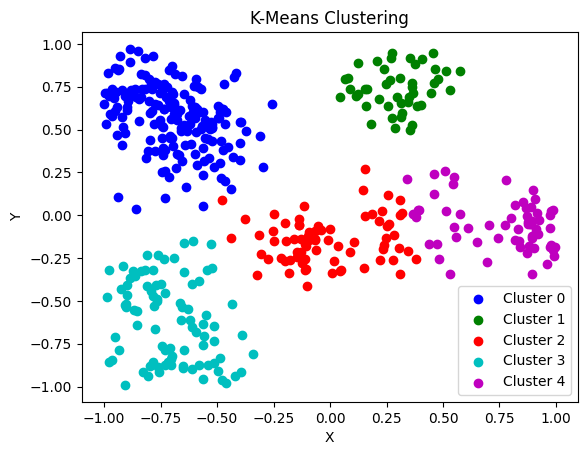

In [ ]:
# Plot each cluster here
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(5):
    plt.scatter(df_kmeans.loc[s_cluster_assignment == i, 'x'], df_kmeans.loc[s_cluster_assignment == i, 'y'], c=colors[i], label=f'Cluster {i}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()